In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency # categorical Vs categorical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

In [ ]:
df = pd.read_csv("Sachin_ODI.csv")

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [ ]:
df["year"] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century,year
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False,1995
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False,1995
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False,1995
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False,1995
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False,1995


In [ ]:
df["Inns"].value_counts()

2    190
1    170
Name: Inns, dtype: int64

## First Vs Second innings

In [ ]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
df_first_innings = df[df["Inns"]==1]
df_second_innings = df[df["Inns"]==2]

In [ ]:
# H0: scoring pattern across these two are the same
ttest_ind(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

Ttest_indResult(statistic=1.4612016295532178, pvalue=0.14483724194759962)

In [ ]:
# H0: scoring pattern across these two are the same
f_oneway(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same

F_onewayResult(statistic=2.1351102022089794, pvalue=0.1448372419476105)

In anova lot of assumptionslike gausian, independence, have same variance so kruskal take rank of whole data.

In [ ]:
# H0: scoring pattern across these two are the same
kruskal(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject: they are the same
# Kruskal when ANOVA assumptions don't hold

KruskalResult(statistic=0.9696787893311016, pvalue=0.32476030097031194)

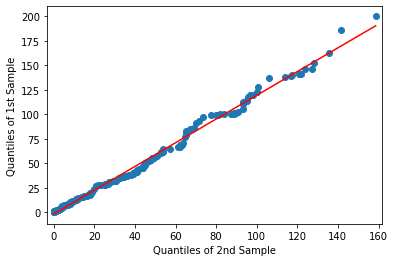

In [ ]:
# Quantile-Quantile plot
qqplot_2samples(df_first_innings["runs"], df_second_innings["runs"], line="r")
plt.show()

In [ ]:
# emperical CDF
e1 = ECDF(df_first_innings["runs"])
e2 = ECDF(df_second_innings["runs"])

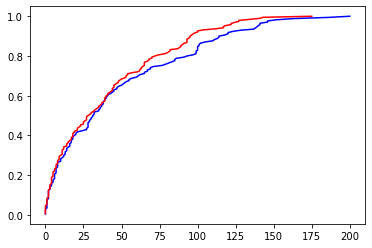

In [ ]:
plt.plot(e1.x, e1.y, c='b')
plt.plot(e2.x, e2.y, c='r')

In [ ]:
# H0: two samples come from same distribution
kstest(df_first_innings["runs"], df_second_innings["runs"])
# Fail to reject

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

What about if there is differance of std dev.. there mean could be same then use levleen test

In [ ]:
df.groupby(["Inns"])["runs"].std()

Inns
1    45.929941
2    38.385904
Name: runs, dtype: float64

In [ ]:
levene(df_first_innings["runs"], df_second_innings["runs"])

LeveneResult(statistic=2.538030840814755, pvalue=0.11201580263415106)

## Won VS Lost

In [ ]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
df_won = df[df["Won"]==True]
df_lost = df[df["Won"]==False]

In [ ]:
ttest_ind(df_won["runs"], df_lost["runs"])

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

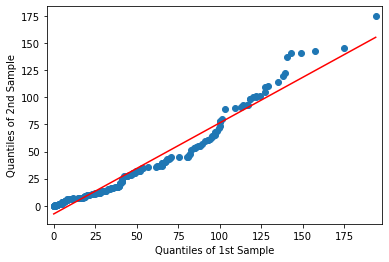

In [ ]:
qqplot_2samples(df_won["runs"], df_lost["runs"], line="r")
plt.show()
# There is significant difference here

In [ ]:
e1 = ECDF(df_won["runs"])
e2 = ECDF(df_lost["runs"])

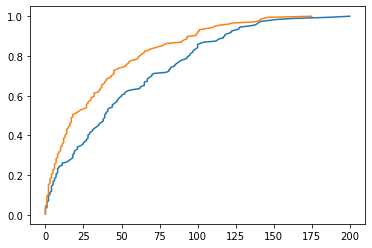

In [ ]:
plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)

In [ ]:
kstest(df_won["runs"], df_lost["runs"])

KstestResult(statistic=0.20602766798418973, pvalue=0.0007769531141107455)

In [ ]:
# Fours
ttest_ind(df_won["fours"], df_lost["fours"])

Ttest_indResult(statistic=4.371696689454384, pvalue=1.617983724969071e-05)

In [ ]:
# Sixes
ttest_ind(df_won["sixes"], df_lost["sixes"])

Ttest_indResult(statistic=1.2103124491248893, pvalue=0.2269575135521876)

## Century Vs No century

In [ ]:
df.groupby(["century"])["runs"].mean()

century
False     31.130573
True     125.913043
Name: runs, dtype: float64

In [ ]:
df_century = df[df["century"]==True]
df_no_century = df[df["century"]==False]

In [ ]:
ttest_ind(df_century["runs"], df_no_century["runs"])

Ttest_indResult(statistic=21.531368860785147, pvalue=1.4753208832764427e-66)

## Won Vs Century

In [ ]:
df_won_and_century = pd.crosstab(df["Won"], df["century"])
df_won_and_century

century,False,True
Won,,
False,160,16
True,154,30


In [ ]:
chi2_contingency(df_won_and_century)

(3.5775197765282374,
 0.05856653223833202,
 1,
 array([[153.51111111,  22.48888889],
        [160.48888889,  23.51111111]]))

## Out of form in any year

In [ ]:
df["runs"].mean()

43.24166666666667

In [ ]:
df.groupby(["year"]).agg({"runs":[np.mean, "count"]})

runs      
            mean count
year                  
1995   37.000000    12
1996   52.666667    30
1997   28.083333    36
1998   57.393939    33
1999   39.095238    21
2000   39.151515    33
2001   56.500000    16
2002   39.000000    19
2003   54.333333    21
2004   38.666667    21
2005   25.750000    16
2006   41.733333    15
2007   44.531250    32
2008   38.333333    12
2009   48.600000    20
2010  102.000000     2
2011   46.636364    11
2012   31.500000    10

In [ ]:
for year in df["year"].unique():
    df_year = df[df["year"]==year]
    df_other_years = df[df["year"]!=year]
    t_stat, p_value = ttest_ind(df_year["runs"], df_other_years["runs"], alternative="less") # for peak form do "greater"
    if p_value < 0.05:
        print("Sachin was out of form in ", year)

Sachin was out of form in  1997
Sachin was out of form in  2005


## Wins across teams

In [ ]:
df.groupby(["Opp"]).agg({"runs":[np.mean, "count"]})

runs      
                    mean count
Opp                           
Australia      44.786885    61
Bangladesh     46.000000    10
Bermuda        57.000000     1
England        46.720000    25
Ireland        21.000000     2
Kenya          71.888889     9
Namibia       152.000000     1
Netherlands    39.500000     2
New Zealand    39.156250    32
Pakistan       38.203390    59
South Africa   39.954545    44
Sri Lanka      43.761905    63
U.A.E.         18.000000     1
West Indies    44.000000    22
Zimbabwe       43.642857    28

In [ ]:
df_opp = df.groupby('Opp').filter(lambda x : len(x) > 5)[["Opp", "runs", "Won"]]

In [ ]:
df_opp

,Opp,runs,Won
0,New Zealand,13,False
1,South Africa,37,False
2,Australia,47,True
3,Bangladesh,48,True
4,Pakistan,4,False
...,...,...,...
355,Australia,14,False
356,Sri Lanka,39,True
357,Sri Lanka,6,True
358,Bangladesh,114,False


In [ ]:
pd.crosstab(df_opp["Opp"], df_opp["Won"])

Won,False,True
Opp,,
Australia,41,20
Bangladesh,2,8
England,12,13
Kenya,2,7
New Zealand,15,17
Pakistan,30,29
South Africa,29,15
Sri Lanka,28,35
West Indies,11,11


In [ ]:
chi2_contingency(pd.crosstab(df_opp["Opp"], df_opp["Won"])) # chi_stat, p_value, dof, expected

(28.16180864243356,
 0.000896252285575796,
 9,
 array([[30.41359773, 30.58640227],
        [ 4.98583569,  5.01416431],
        [12.46458924, 12.53541076],
        [ 4.48725212,  4.51274788],
        [15.95467422, 16.04532578],
        [29.41643059, 29.58356941],
        [21.93767705, 22.06232295],
        [31.41076487, 31.58923513],
        [10.96883853, 11.03116147],
        [13.96033994, 14.03966006]]))

## Average across teams

New Zealand [24.53125 55.78125]
South Africa [28.22670455 53.15909091]
Australia [34.04918033 55.8852459 ]
Bangladesh [29.1 66.1]
Pakistan [28.64364407 48.44152542]
Sri Lanka [34.25396825 53.77777778]
Kenya [ 35.         108.11666667]
West Indies [27.31818182 61.59090909]
Zimbabwe [27.96428571 60.82321429]
England [33.16 60.64]


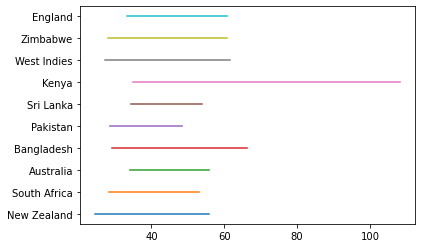

In [ ]:
df_opp_runs = df_opp[["Opp", "runs"]]
y = 0
for team in df_opp_runs["Opp"].unique():
    df_one_team = df_opp_runs[df_opp_runs["Opp"]==team]["runs"]
    sample_means = [df_one_team.sample(len(df_one_team), replace=True).mean() for i in range(10000)]
    confidence_interval = np.percentile(sample_means, [2.5, 97.5])
    print(team, confidence_interval)
    plt.plot(confidence_interval, [y, y])
    y += 1

plt.yticks(range(y), df_opp_runs["Opp"].unique())
plt.show()


## Correlations

<AxesSubplot:>

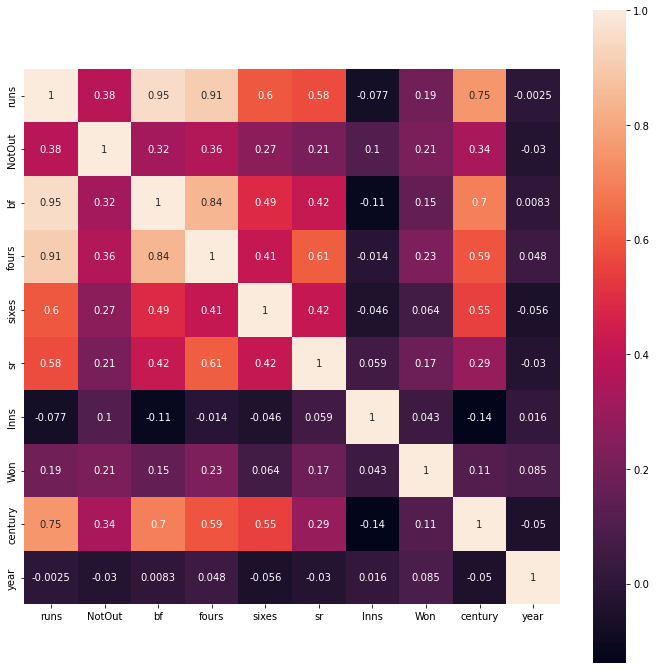

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True)

Year and runs less
runs and fours
runs vs ball faced
won vs four and six

In [ ]:
pearsonr(df["Won"], df["fours"])

(0.225120477357304, 1.617983724968977e-05)

In [ ]:
pearsonr(df["Won"], df["sixes"])

(0.06383653147729083, 0.22695751355219082)

<AxesSubplot:xlabel='runs', ylabel='bf'>

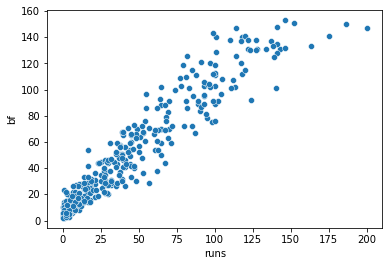

In [ ]:
sns.scatterplot(x=df["runs"], y=df["bf"])

<AxesSubplot:xlabel='year', ylabel='runs'>

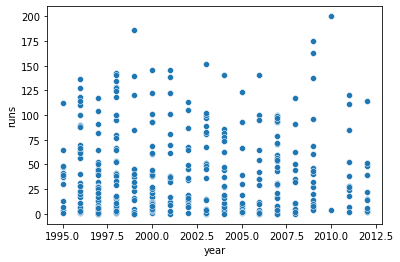

In [ ]:
sns.scatterplot(x=df["year"], y=df["runs"])

# Numpy random

In [ ]:
samples_normal = np.random.normal(loc=3, scale=2, size=200)

In [ ]:
len(samples_normal)

200

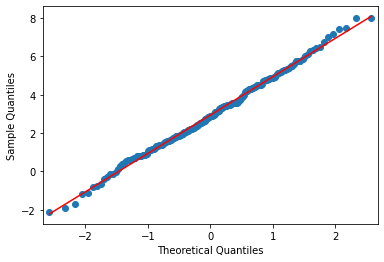

In [ ]:
# comparing with gaussian
qqplot(samples_normal, line="r")
plt.show()

In [ ]:
kstest(samples_normal, norm.cdf, args=(samples_normal.mean(), samples_normal.std()))

KstestResult(statistic=0.04251847314877377, pvalue=0.8472004052135084)

In [ ]:
#also rank based.. checks if data from normal distribution
shapiro(samples_normal)

ShapiroResult(statistic=0.9916731119155884, pvalue=0.30884888768196106)

In [ ]:
samples_exponential = np.random.exponential(size=200)

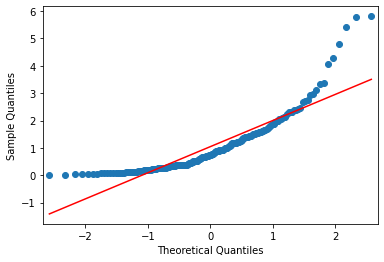

In [ ]:
qqplot(samples_exponential, line="r")
plt.show()

In [ ]:
kstest(samples_exponential, norm.cdf, args=(samples_exponential.mean(), samples_exponential.std()))

KstestResult(statistic=0.15837414274911998, pvalue=7.548826904336782e-05)

In [ ]:
shapiro(samples_exponential)

ShapiroResult(statistic=0.8042756915092468, pvalue=4.133942181492245e-15)

# Homework:

Use sklearn SelectKBest with chi2 and choose best features from Sachin's data for predicting win